<img src="images/ublogo.png"/>

### CSE610 - Bayesian Non-parametric Machine Learning

  - Lecture Notes
  - Instructor - Varun Chandola
  - Term - Fall 2020

### Objective
The objective of this notebook is to provide a refresher of the concepts in probability and statistics that will be needed to get started in this course.

### Probability basics:
- **Experiment**: A random trial with one out of many possible outcomes.
> Toss of a coin, roll of a dice.
- **Sample space ($\Omega$)**: Set of all possible outcomes.
> For toss of a coin, $\Omega - \{H,T\}$, For toss of two coins: $\Omega - \{(H,H),(H,T),(T,H),(T,T)\}$.
- **Event ($E$)**: A question about the experiment with a `yes`/`no` answer. The result is a subset of $\Omega$; the outcomes for which the question is `yes`.
> For toss of two coins: *First coin is heads*: $\{(H,H),(H,T)\}$
- **Probability measure**: A function that assigns a value $P(E)$ to an event $E$.

*Note*: Visualizing $E$ as a subset of $\Omega$, i.e., the outcomes within $\Omega$ which will be `yes` under $E$ is a very useful technique.

<img src='images/venn1.png'/>


### The laws of probability
- $P(E) \in \mathbb{R}, P(E) \ge 0, \forall E \in \Omega$
- $P(\Omega) = 1$
- $P(E_1 \cup E_2) = P(E_1) + P(E_2), \text{if } E_1 \cap E_2 = \varnothing$

<img src='images/venn2.png'/>

### Corollaries
- **Sum Rule**: $P(E_1 \cup E_2) = P(E_1) + P(E_2) -P(E_1 \cap E_2)$
- $P(\varnothing) = 0$
- **Product Rule**:
$$
P(E_1 \vert E_2) = \frac{P(E_1 \cup E_2)}{P(E_2)}
$$
> _Conditional probability_ is a very important concept that you need to be absolutely sure about. Remember that conditional probability simply means the change of support for the event in the numerator. What is the probability of event $E_1$ to take a certain outcome, when $E_2$ takes a certain value?

### Random Variables
A random variable $X$ is a variable which is defined over a domain, $\Omega$, and can take any value from that domain as an outcome of a random phenomenon.

- **Probability Density Function (PDF)**: A random variable has a probability density, $p_x()$, if:
$$
P(a \le x \le b) = \int_a^b p_X(x) dx
$$
> Note that the subscript in $p_X(x)$ means that this pdf is for the random variable $X$ and is typically used to differentiate it from the pdf of another random variable, say $Y$. Often the subscript is dropped if there is only random variable being discussed.
- **Cumulative Density Function (CDF)**
$$
F_X(x) = \int_{-\infty}^x p_X(x) dx
$$

- **Relationship between PDF and CDF**
$$
P(a \le x \le b) = F_X(b) - F_X(a)
$$
- **Expected Value of a Random Variable**
$$
\mathbb{E}_{p_X}[x] = \int_{-\infty}^{\infty} x p_X(x)dx
$$
- **Variance**
$$
Var_{p_X}[x] = \mathbb{E}_{p_X}[(x - \mathbb{E}_{p_X}[x])^2] = \mathbb{E}_{p_X}[x^2] - (\mathbb{E}_{p_X}[x])^2
$$
- **Standard Deviation**
$$
\sigma(x) = \sqrt(Var_{p_X}[x])
$$

### Joint (multi-variate) random variables
Where we study the distribution of two (or more) random variables, each with their own domains.
$$
P(a\le x \le b \wedge c \le y \le d) = \int_c^d\int_a^b p_{XY}(x,y)dx dy
$$
- **Covariance**
$$
cov(x,y) = \mathbb{E}_{p_{XY}}[(x - \mathbb{E}_{p_{XY}}[x])(y - \mathbb{E}_{p_{XY}}[y])]
$$
- **Marginal Probability**
$$
p(x) = \int_{-\infty}^\infty p(x,y)dy
$$
- **Conditional Probability**
$$
p(x\vert y) = \frac{p(x,y)}{p(y)}
$$

### Univariate Normal Distribution
- PDF:
$$
\mathcal{N}(x\vert \mu,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\left[-\frac{1}{2\sigma^2}(x - \mu)^2\right]}
$$

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,multivariate_normal
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)
%matplotlib inline

Text(0.5, 1.0, 'CDF')

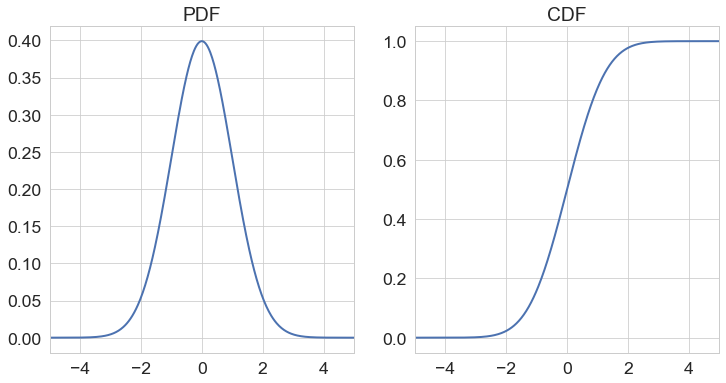

In [79]:
mu,sigma = 0,1
x = np.linspace(-10, 10, 1001)
# plot the density
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
pt = axs[0].plot(x, norm(mu, sigma).pdf(x), linewidth=2)
axs[0].set_xlim([-5,5])
axs[0].set_title('PDF')
# plot the cdf
pt = axs[1].plot(x, norm(mu, sigma).cdf(x), linewidth=2)
axs[1].set_xlim([-5,5])
axs[1].set_title('CDF')

### Multivariate Normal Distribution
- PDF:
$$
\mathcal{N}({\bf x}\vert {\bf \mu},\Sigma) = \frac{1}{(2\pi)^{-D/2}\vert\Sigma\vert^{1/2}}\exp{\left[-\frac{1}{2}({\bf x} - {\bf \mu})^\top\Sigma^{-1}({\bf x} - {\bf \mu})\right]}
$$

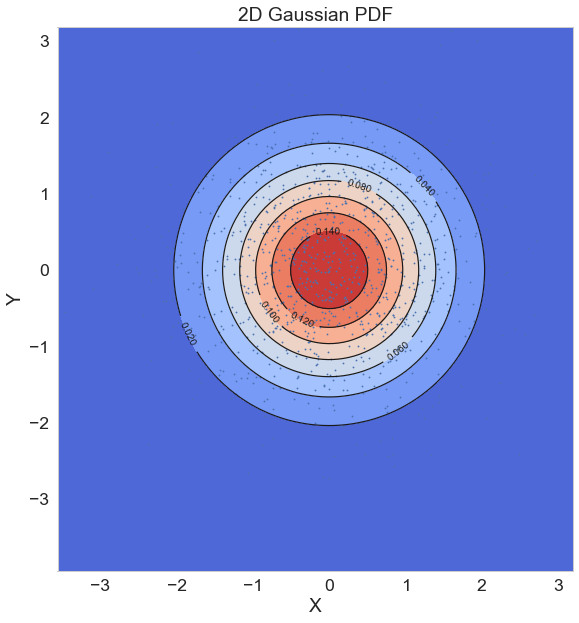

In [93]:
mu = np.array([0,0])
Sigma = np.array([[1,0],[0,1]])
samples = multivariate_normal(mu,Sigma).rvs(1000)
# Extract x and y
xmin,ymin = list(np.min(samples,axis=0))
xmax,ymax = list(np.max(samples,axis=0))
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()]).T
pdfs = multivariate_normal(mu,Sigma).pdf(positions)
pdfs = np.reshape(pdfs,xx.shape)
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, pdfs, cmap='coolwarm')
ax.imshow(pdfs, cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
ax.scatter(samples[:,0],samples[:,1],s=1)
cset = ax.contour(xx, yy, pdfs, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
titlestr = plt.title('2D Gaussian PDF')

### Relationship between random variables

#### Independence
$$
P(E_1 \cap E_2) = P(E_1)P(E_2)
$$

#### Conditional independence
$$
P(E_1 \cap E_2\vert E_3) = P(E_1\vert E_3)P(E_2 \vert E_3)
$$

